In [4]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr

import matplotlib.pyplot as plt
%matplotlib inline 

Index(['mut_id', 'pmd_id', 'nr', 'crossref', 'uniprot_id', 'ensembl_id',
       'taxid', 'protein', 'mut_PMD', 'mut_real', 'wt', 'mut', 'prot_pos',
       'function_summarized', 'functional_effect', 'function', 'seq', 'snp_id',
       'mrna_acc', 'mrna_ver', 'mrna_pos', 'allele', 'protein_acc',
       'protein_ver', 'verified', 'chrom', 'chrom_pos', 'variation',
       'variant_type', 'ref_allele', 'alt_allele', 'pmd_nr_id', 'pred'],
      dtype='object')


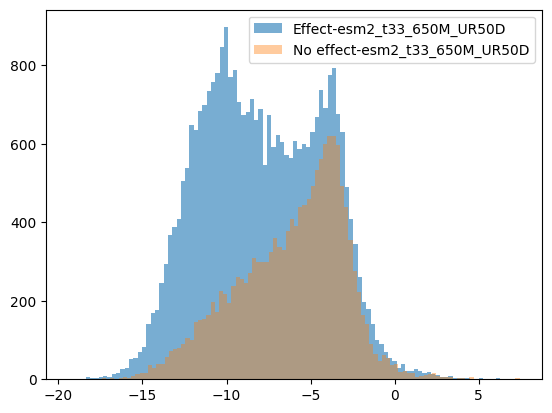

In [9]:
model_name = "esm2_t33_650M_UR50D"
# result_df = pd.read_csv(home_dir+"models/esm_rives/outputs/predictions_esm1_t6_43M_UR50S.csv", sep="\t")
# result_df = pd.read_csv(home_dir+f"models/esm_rives/outputs/popu_freq_preds_{model_name}_(mt-wt).csv", sep="\t")
result_df = pd.read_csv(home_dir+f"models/esm_rives/outputs/{model_name}/pmd/preds_esm2_t33_650M_UR50D.tsv", sep="\t")
print(result_df.columns)

effect = result_df[result_df["functional_effect"]=="Effect"]
no_effect = result_df[result_df["functional_effect"]=="No-effect"]

bins = 100 # 20, 100, 500
plt.hist(effect["pred"], bins=bins, density=False, log=False, alpha=.6, label=f"Effect-{model_name}")
plt.hist(no_effect["pred"], bins=bins, density=False, log=False, alpha=.4, label=f"No effect-{model_name}")

plt.legend()
plt.show()

In [4]:
# normalization effect check: does not effect in the rank correlation at all
print(result_df["mt_freq"].min(), result_df["mt_freq"].max())
processed_result_df = result_df.copy()
processed_result_df["mt_freq"]=(result_df["mt_freq"]-result_df["mt_freq"].min())/(result_df["mt_freq"].max()-result_df["mt_freq"].min())
processed_result_df["pred"]=(result_df["pred"]-result_df["pred"].min())/(result_df["pred"].max()-result_df["pred"].min())

4.873223101026788e-06 0.5


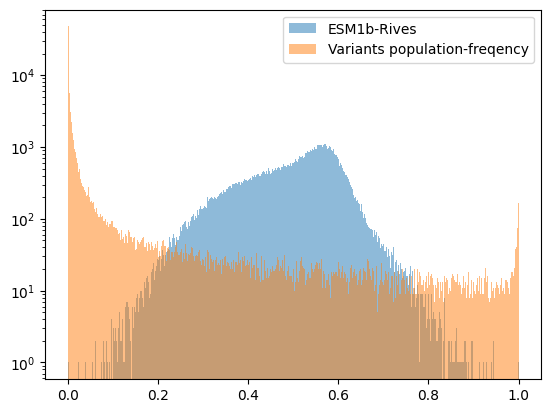

In [5]:
# bins = (np.logspace(0, 1.041392685158225, 500, base=10) - 1) / 10
# plt.hist(processed_result_df["pred"], bins, log=True, density=True, alpha=.5, label="ESM-Rives")
# plt.hist(processed_result_df["mt_freq"], bins, log=True, density=True, alpha=.5, label="Variants population-freqency")
plt.hist(processed_result_df["pred"], bins=500, log=True, alpha=.5, label="ESM1b-Rives")
plt.hist(processed_result_df["mt_freq"], bins=500, log=True, alpha=.5, label="Variants population-freqency")
plt.legend()
plt.show()

In [6]:
print(spearmanr(result_df["pred"], result_df["mt_freq"]))
print(pearsonr(result_df["pred"], result_df["mt_freq"]))

print(spearmanr(processed_result_df["pred"], processed_result_df["mt_freq"]))
print(pearsonr(processed_result_df["pred"], processed_result_df["mt_freq"]))

SignificanceResult(statistic=0.18158536492048985, pvalue=0.0)
PearsonRResult(statistic=0.1428013404673954, pvalue=0.0)
SignificanceResult(statistic=0.18158536492048985, pvalue=0.0)
PearsonRResult(statistic=0.1428013404673954, pvalue=0.0)
